In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first()
date

('2017-08-23',)

In [11]:
conn = engine.connect()

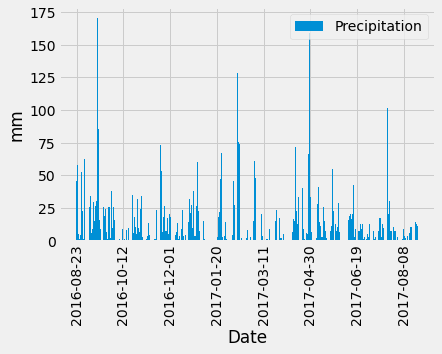

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
start_point = dt.date(2017, 8, 23) - dt.timedelta(days=365)
start_point

# Perform a query to retrieve the data and precipitation scores
dp_rain = session.query(measurement.date, func.max(measurement.prcp)).group_by(measurement.date).filter(measurement.date >= start_point)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(dp_rain.statement, conn)
df.head()

# Sort the dataframe by date
df1 = df.sort_values(by='date')
df2 = df1.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
labels = []
y_axis = df2['max_1']
x_axis = df2['date']
plt.bar(x_axis, y_axis, align="center")
plt.ylabel('mm')
plt.xlabel('Date')
plt.legend(['Precipitation'])
plt.xticks(x_axis, x_axis[::50], rotation='vertical')
plt.locator_params(axis='x', nbins=len(x_axis)/50)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df2.describe()

,max_1
count,366.000000
mean,13.231694
std,21.101073
min,0.000000
25%,1.000000
50%,6.400000
75%,17.100000
max,170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()


9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The minimum temperature is {min}')
max = session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The maximum temperature is {max}')
avg = session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The average temperature is {avg}')


The minimum temperature is [('USC00519281', 12.2)]
The maximum temperature is [('USC00519281', 29.4)]
The average temperature is [('USC00519281', 22.03582251082252)]


Text(0, 0.5, 'Frequency')

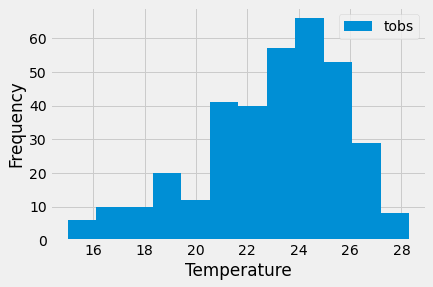

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_yr = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= start_point).all()

temp_list = []
for temp in tobs_yr:
    temp_list.append(temp[0])

plt.hist(temp_list, bins=12, histtype='bar')
plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [19]:
# Close Session
session.close()